In [1]:
import qiskit
from qiskit import *
from qiskit.tools.visualization import *
from qiskit.tools.monitor import job_monitor
from qiskit import IBMQ
%matplotlib inline

In [2]:
with open('tocken.txt', 'r') as file:
    myTocken = file.read().replace('\n', '')
IBMQ.save_account(myTocken,overwrite=True)
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

Build a quantum register, classical register with 1 qbit each

In [3]:
qr = QuantumRegister(1)
cr = ClassicalRegister(1)

now, build a circuit of both of them

In [4]:
circuit = QuantumCircuit(qr,cr)

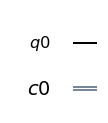

In [6]:
circuit.draw(output='mpl')

Next stage is to build the gates that can make use of this simple circuit

demonstrate quantum superposition, Hadamard gate

Apply hadamard gate on the first Qbit

In [7]:
circuit.h(qr[0])

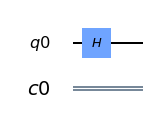

In [8]:
circuit.draw(output='mpl')

now there is is superposition of quantum state

Now, measure the qbit and store the result in classical bits

In [9]:
circuit.measure(qr,cr)

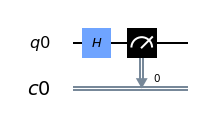

In [10]:
circuit.draw('mpl')

In [11]:
simulator = Aer.get_backend('qasm_simulator')

Now, run the circuit in a simulator

will use qasm simulator: quantum assembly language

now call the simulator

In [12]:
sim_job = execute(circuit,backend=simulator)

execute the circuit

In [13]:
resultSimulation = sim_job.result()

retrieve the results

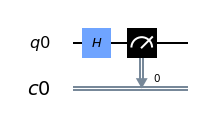

In [14]:
circuit.draw('mpl')

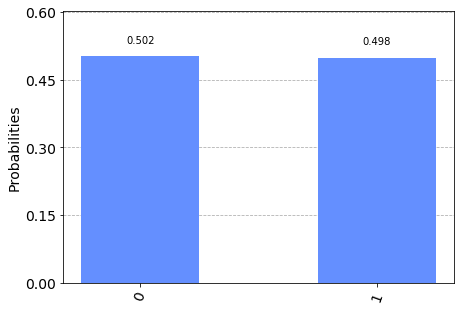

In [15]:
plot_histogram(resultSimulation.get_counts(circuit))

In [16]:
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_16_melbourne')
job = execute(circuit, backend=qcomp)
job_monitor(job)

Job Status: job has successfully run


Now, lets run it on real quantum computer

In [17]:
resultfromQC = job.result()

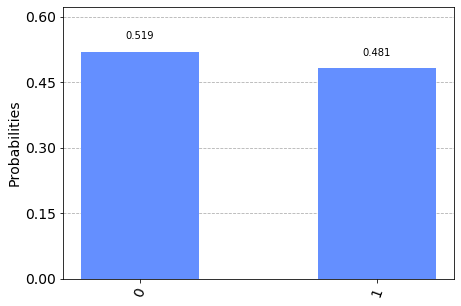

In [18]:
plot_histogram(resultfromQC.get_counts(circuit))